#Importing the Required libraries:

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

#Load the Data Sets:

In [2]:
# Load first dataset
data1 = pd.read_csv("/content/earthquake_1995-2023.csv")

# Load second dataset
data2 = pd.read_csv("/content/earthquake_data.csv")

In [7]:
data1.head()

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 6.5 - 42 km W of Sola, Vanuatu",6.5,16-08-2023 12:47,7,4,green,0,657,us,114,7.177000,25.0,mww,192.955,-13.8814,167.1580,"Sola, Vanuatu",NaN,Vanuatu
1,"M 6.5 - 43 km S of Intipucá, El Salvador",6.5,19-07-2023 00:22,8,6,yellow,0,775,us,92,0.679000,40.0,mww,69.727,12.8140,-88.1265,"Intipucá, El Salvador",NaN,NaN
2,"M 6.6 - 25 km ESE of Loncopué, Argentina",6.6,17-07-2023 03:05,7,5,green,0,899,us,70,1.634000,28.0,mww,171.371,-38.1911,-70.3731,"Loncopué, Argentina",South America,Argentina
3,"M 7.2 - 98 km S of Sand Point, Alaska",7.2,16-07-2023 06:48,6,6,green,1,860,us,173,0.907000,36.0,mww,32.571,54.3844,-160.6990,"Sand Point, Alaska",NaN,NaN
4,M 7.3 - Alaska Peninsula,7.3,16-07-2023 06:48,0,5,NaN,1,820,at,79,0.879451,172.8,Mi,21.000,54.4900,-160.7960,Alaska Peninsula,NaN,NaN


In [6]:
data1.shape

(1000, 19)

In [8]:
data2.head()

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 7.0 - 18 km SW of Malango, Solomon Islands",7.0,22-11-2022 02:03,8,7,green,1,768,us,117,0.509,17.0,mww,14.000,-9.7963,159.596,"Malango, Solomon Islands",Oceania,Solomon Islands
1,"M 6.9 - 204 km SW of Bengkulu, Indonesia",6.9,18-11-2022 13:37,4,4,green,0,735,us,99,2.229,34.0,mww,25.000,-4.9559,100.738,"Bengkulu, Indonesia",NaN,NaN
2,M 7.0 -,7.0,12-11-2022 07:09,3,3,green,1,755,us,147,3.125,18.0,mww,579.000,-20.0508,-178.346,NaN,Oceania,Fiji
3,"M 7.3 - 205 km ESE of Neiafu, Tonga",7.3,11-11-2022 10:48,5,5,green,1,833,us,149,1.865,21.0,mww,37.000,-19.2918,-172.129,"Neiafu, Tonga",NaN,NaN
4,M 6.6 -,6.6,09-11-2022 10:14,0,2,green,1,670,us,131,4.998,27.0,mww,624.464,-25.5948,178.278,NaN,NaN,NaN


In [9]:
data2.shape

(782, 19)

#Data Gathering:

In [11]:
# Combine first and second data
combined_data = pd.concat([data1, data2], axis=0)

In [12]:
combined_data.shape

(1782, 19)

In [13]:
combined_data.head()

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 6.5 - 42 km W of Sola, Vanuatu",6.5,16-08-2023 12:47,7,4,green,0,657,us,114,7.177000,25.0,mww,192.955,-13.8814,167.1580,"Sola, Vanuatu",NaN,Vanuatu
1,"M 6.5 - 43 km S of Intipucá, El Salvador",6.5,19-07-2023 00:22,8,6,yellow,0,775,us,92,0.679000,40.0,mww,69.727,12.8140,-88.1265,"Intipucá, El Salvador",NaN,NaN
2,"M 6.6 - 25 km ESE of Loncopué, Argentina",6.6,17-07-2023 03:05,7,5,green,0,899,us,70,1.634000,28.0,mww,171.371,-38.1911,-70.3731,"Loncopué, Argentina",South America,Argentina
3,"M 7.2 - 98 km S of Sand Point, Alaska",7.2,16-07-2023 06:48,6,6,green,1,860,us,173,0.907000,36.0,mww,32.571,54.3844,-160.6990,"Sand Point, Alaska",NaN,NaN
4,M 7.3 - Alaska Peninsula,7.3,16-07-2023 06:48,0,5,NaN,1,820,at,79,0.879451,172.8,Mi,21.000,54.4900,-160.7960,Alaska Peninsula,NaN,NaN


In [14]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1782 entries, 0 to 781
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      1782 non-null   object 
 1   magnitude  1782 non-null   float64
 2   date_time  1782 non-null   object 
 3   cdi        1782 non-null   int64  
 4   mmi        1782 non-null   int64  
 5   alert      864 non-null    object 
 6   tsunami    1782 non-null   int64  
 7   sig        1782 non-null   int64  
 8   net        1782 non-null   object 
 9   nst        1782 non-null   int64  
 10  dmin       1782 non-null   float64
 11  gap        1782 non-null   float64
 12  magType    1782 non-null   object 
 13  depth      1782 non-null   float64
 14  latitude   1782 non-null   float64
 15  longitude  1782 non-null   float64
 16  location   1771 non-null   object 
 17  continent  490 non-null    object 
 18  country    1135 non-null   object 
dtypes: float64(6), int64(5), object(8)
memory usage: 343.0

#Data Cleaning

In [15]:
combined_data.isnull().sum()

title           0
magnitude       0
date_time       0
cdi             0
mmi             0
alert         918
tsunami         0
sig             0
net             0
nst             0
dmin            0
gap             0
magType         0
depth           0
latitude        0
longitude       0
location       11
continent    1292
country       647
dtype: int64

###We will create new data set after Removinig irrelevent Columns

In [16]:
features = ["magnitude", "depth", "cdi", "mmi", "sig"]
target = "alert"
data = combined_data[features + [target]]
data.head()

,magnitude,depth,cdi,mmi,sig,alert
0,6.5,192.955,7,4,657,green
1,6.5,69.727,8,6,775,yellow
2,6.6,171.371,7,5,899,green
3,7.2,32.571,6,6,860,green
4,7.3,21.000,0,5,820,NaN


In [18]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 864 entries, 0 to 507
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  864 non-null    float64
 1   depth      864 non-null    float64
 2   cdi        864 non-null    int64  
 3   mmi        864 non-null    int64  
 4   sig        864 non-null    int64  
 5   alert      864 non-null    object 
dtypes: float64(2), int64(3), object(1)
memory usage: 47.2+ KB


<ipython-input-18-9529224e9d0a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


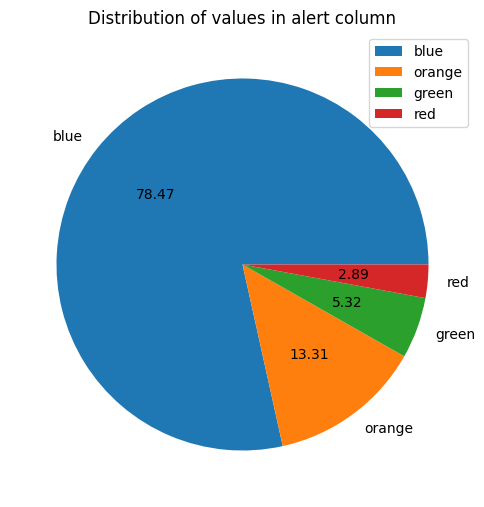

In [19]:
plt.figure(figsize = (6,12))
plt.pie(x = data[target].value_counts(), labels = ['blue','orange','green','red'], autopct = '%.2f')
plt.title("Distribution of values in alert column")
plt.legend()
plt.show()

In [21]:
data.shape

(864, 6)

###Changing the data types

In [22]:
data = data.astype({'cdi': 'int8', 'mmi': 'int8', 'sig': 'int8', 'depth': 'int16', 'alert': 'category'})
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 864 entries, 0 to 507
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   magnitude  864 non-null    float64 
 1   depth      864 non-null    int16   
 2   cdi        864 non-null    int8    
 3   mmi        864 non-null    int8    
 4   sig        864 non-null    int8    
 5   alert      864 non-null    category
dtypes: category(1), float64(1), int16(1), int8(3)
memory usage: 18.8 KB


## Data Preprocessing

In [24]:
X = data[features]
y = data[target]
# Removiing Duplicates
X = X.loc[:,~X.columns.duplicated()]
X.shape, y.shape

((864, 5), (864,))

###Removing Class Imbalance Problem

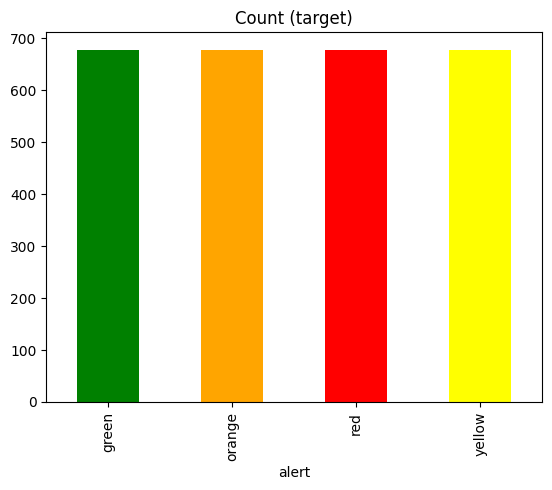

In [25]:
sm = SMOTE(random_state=42)
X_res, y_res= sm.fit_resample(X, y,)

y_res.value_counts().plot(kind='bar', title='Count (target)', color=['green', 'orange', 'red', 'yellow']);

###Train Test Split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

#### Standardize the numeric features

In [28]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Selection and Fine-Tuning or Training, Optimization, and Validation

###Random Forest Model

In [34]:
# Train the Random Forest model
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

###K Nearest Neighbor

In [35]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [36]:
# Predict on test data using Random Forest
y_pred_rf = rf_classifier.predict(X_test)

# Predict on test data using KNN
y_pred_knn = knn_classifier.predict(X_test)


In [37]:
# Calculate accuracy for Random Forest
rf_accuracy = accuracy_score(y_test, y_pred_rf) * 100

# Calculate accuracy for KNN
knn_accuracy = accuracy_score(y_test, y_pred_knn) * 100

# Print the accuracy scores
print("Accuracy of Random Forest Model:", rf_accuracy)
print("Accuracy of KNN Model:", knn_accuracy)


Accuracy of Random Forest Model: 98.52670349907919
Accuracy of KNN Model: 91.89686924493554


In [39]:
# Confusion matrix of Random Forest
rf_cm = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix for Random Forest Model:")
print(rf_cm)
# Confusion matrix of KNN
knn_cm = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix for KNN Model:")
print(knn_cm)

Confusion Matrix for Random Forest Model:
[[136   4   0   4]
 [  0 128   0   0]
 [  0   0 129   0]
 [  0   0   0 142]]
Confusion Matrix for KNN Model:
[[118   7   2  17]
 [  2 123   1   2]
 [  1   1 127   0]
 [  4   2   5 131]]


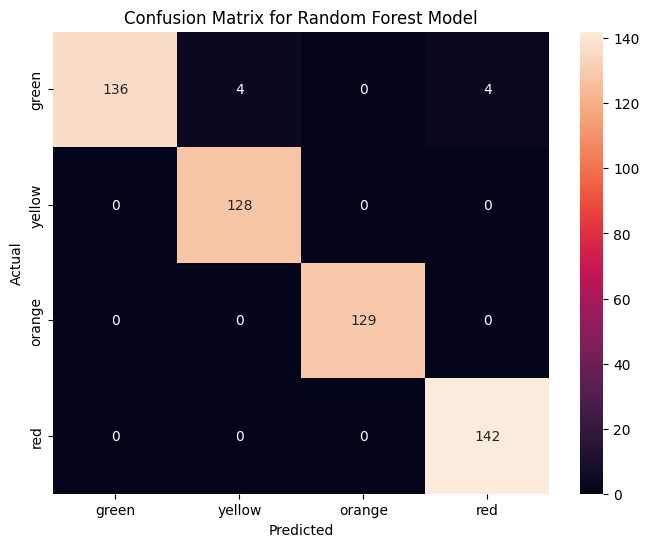

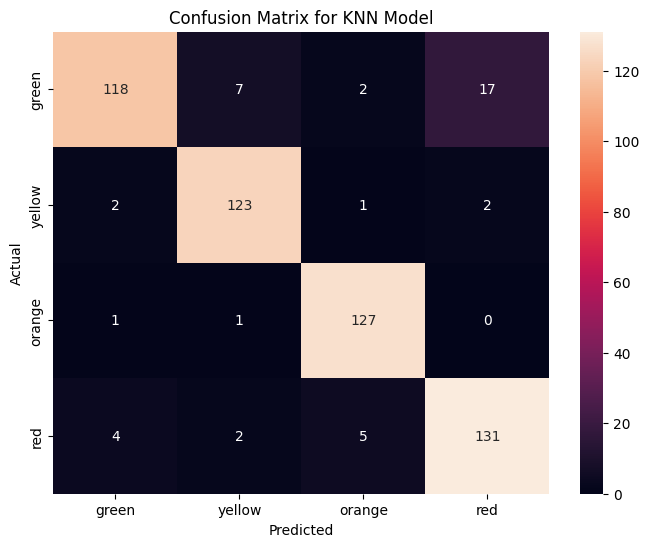

In [40]:

# Plot confusion matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt="d", xticklabels=data[target].unique(), yticklabels=data[target].unique())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Random Forest Model")
plt.show()

# Plot confusion matrix for KNN
plt.figure(figsize=(8, 6))
sns.heatmap(knn_cm, annot=True, fmt="d", xticklabels=data[target].unique(), yticklabels=data[target].unique())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for KNN Model")
plt.show()


##As a Result **Random Forest Classifier Model** is performinng very Good